In [1]:
import numpy as np

In [2]:
a = np.array([2,1])
a

array([2, 1])

In [3]:
np.sqrt(a*a)

array([2., 1.])

In [4]:
b = np.array([4,2])
np.inner(b,b)

20

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
texts = ["apple pear","apple pear apple pear","apple apple pear"]
textnames = ["A","B","C"]
vec = CountVectorizer()
dfmat = vec.fit_transform(texts).todense()
dfmat
a = dfmat[0,].A1
b = dfmat[1,].A1
c = dfmat[2,].A1

In [6]:
import matplotlib.pyplot as plt

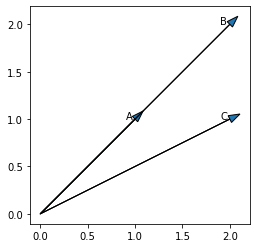

In [7]:
fig, ax = plt.subplots()
for i, row in enumerate(dfmat):
    x = row.A1[0]
    y = row.A1[1]
    ax.arrow(0,0,x,y,head_width=0.08)
    ax.text(x-0.1,y,textnames[i])
ax.set_aspect("equal")

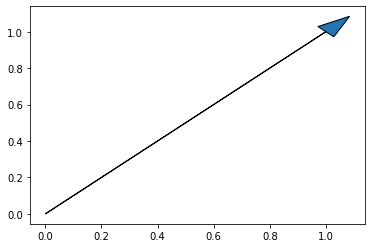

In [8]:
fig, ax = plt.subplots()

ax.arrow(0,0,1,1,head_width=0.08)

In [9]:
from scipy.spatial.distance import euclidean
euclidean(a,b)

1.4142135623730951

In [10]:
euclidean(a,c)

1.0

In [11]:
(a[0]-b[0])**2 + (a[1]-b[1])**2

2

In [12]:
(b[0]-a[0])**2 + (b[1]-a[1])**2

2

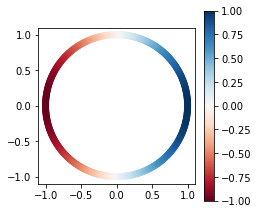

In [13]:
from matplotlib.colors import CenteredNorm
import matplotlib.cm as cm
colormap = cm.RdBu
norm = CenteredNorm()

fig, ax = plt.subplots(figsize=(3.5,3.5))

degrees = range(360)
radians = np.radians(degrees)
x = 1*np.cos(radians)
y = 1*np.sin(radians)
similarity = np.cos(radians)
   
circ = ax.scatter(x,y, c=similarity, norm=norm, cmap=colormap)
    
ax.set_aspect("equal")
plt.colorbar(circ)

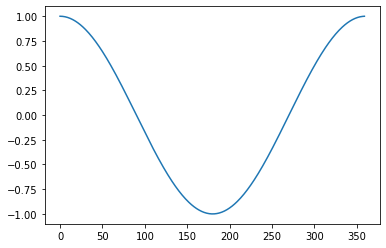

In [14]:
fig, ax = plt.subplots()

ax.plot(similarity)

In [15]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
texts = [
  "apple orange pear", "apple pear quince",
  "apple pear orange quince peach avocado kiwi physalis"
]
vec = CountVectorizer()
dfmat = vec.fit_transform(texts)
dist_dfmat = cosine_similarity(dfmat)
dist_dfmat

array([[1.        , 0.66666667, 0.61237244],
       [0.66666667, 1.        , 0.61237244],
       [0.61237244, 0.61237244, 1.        ]])

In [16]:
dist_dfmat[0,1] = -0.5
print(-dist_dfmat)
np.fill_diagonal(dist_dfmat,np.NaN)
np.argsort(-dist_dfmat[0])

[[-1.          0.5        -0.61237244]
 [-0.66666667 -1.         -0.61237244]
 [-0.61237244 -0.61237244 -1.        ]]


array([2, 1, 0])

In [33]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
from scipy import spatial

texts = [
    "Central bankers signal intention to press ahead with aggressive campaign to tighten monetary policy",
    "",
    "SpaceX’s Starlink terminals in Ukraine back online after outages"
]
vec = CountVectorizer()
dfmat = vec.fit_transform(texts).toarray()
print(1 - spatial.distance.cosine(dfmat[-2],dfmat[-3]))
print(1 - spatial.distance.cosine(dfmat[-1],dfmat[-2]))

0.17677669529663687
0.2357022603955159


In [21]:
dfmat[-2]

<1x15 sparse matrix of type '<class 'numpy.int64'>'
	with 13 stored elements in Compressed Sparse Row format>

0.8017837257372732

In [16]:
import pandas as pd
df = pd.read_csv("data/manifesto_sentences.csv")
print(df.shape)
df.head()

(7485, 5)


party                                               text  \
0      FDP   Um die Attraktivität des Erzieherberufs zu st...   
1  GRUENEN   Das Asylrecht beruht auf der Einzelfallprüfun...   
2      FDP   Sie kann in Form einer Patenschaft mit Organi...   
3  GRUENEN   Gut funktionierende Konzepte der Arbeitsmigra...   
4      SPD          000 Sozialwohnungen jährlich erforderlich   

                                           paragraph  par_id  sentence_id  
0  Frühkindliche Bildung stärkenWir Freie Demokra...      94            2  
1  Rechtsstaatlichkeit und Menschenrechte  an den...     597            8  
2  Chancen für Aufstieg unabhängig von der Herkun...     105            2  
3  Ein modernes Einwanderungsgesetz für eine  vie...     449            6  
4  Es gibt eine gemeinsame Verantwortung aller Be...     241            2

In [17]:
import os
df = pd.DataFrame()
parties = ["FDP","GRUENEN","SPD","CDU","AFD","LINKE"]
party_ids = [41420,41113,41320,41521,41953,41223]
for party, pid in zip(parties, party_ids):
    pdf = pd.read_csv(f"data/{pid}_202109.csv")
    pdf["party"] = party
    df = pd.concat([df,pdf])
df = df[pd.notna(df["cmp_code"]) & (df["cmp_code"]!="H") & (df["cmp_code"]!="000")]
df = df[df["text"].str.len()>30].reset_index(drop=True)
print(df.shape)
df.head()

(16652, 4)


text cmp_code  eu_code party
0  Trotzdem wurde in Deutschland zu lange das trü...    305.1      NaN   FDP
1  Viele haben dem Versprechen vertraut, dass Deu...    305.1      NaN   FDP
2                  Heute wissen wir: Das war falsch!    305.1      NaN   FDP
3  Das Ergebnis war eine Politik, die unseren Sta...      303      NaN   FDP
4  Während andere Staaten ihre Verwaltung digital...      303      NaN   FDP

In [34]:
import os
df = pd.DataFrame()
parties = ["Labour","LibDems","Conservatives","Greens"]
party_ids = [51320,51421,51620,51110]
for party, pid in zip(parties, party_ids):
    pdf = pd.read_csv(f"data/{pid}_201912.csv")
    pdf["party"] = party
    df = pd.concat([df,pdf])
df = df[pd.notna(df["cmp_code"]) & (df["cmp_code"]!="H") & (df["cmp_code"]!="000")]
df = df[df["text"].str.len()>30].reset_index(drop=True)
sums = dfmat.sum(axis=1).A1
df = df.drop(np.argwhere(sums==0)[:,0]).reset_index(drop=True)
vec = TfidfVectorizer(min_df=5, max_df=0.5, stop_words="english")
dfmat = vec.fit_transform(df["text"])
print(df.shape)
df.to_csv("data/uk_manifestos.csv", index=False)
df.head()

(5240, 4)


text cmp_code  eu_code   party
0  This election is about the crisis of living st...      503      NaN  Labour
1       and the climate and environmental emergency.      501      NaN  Labour
2  Whether we are ready or not, we stand on the b...      501      NaN  Labour
3  We must confront this change while dealing wit...      503      NaN  Labour
4  Labour led the UK Parliament in declaring a cl...      501      NaN  Labour

array([  74,  311,  406,  517,  581,  741, 1000, 2973, 3191, 3767, 4162,
       4520, 5011])

In [19]:
df = pd.read_csv("data/uk_manifestos.csv")


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
df = pd.read_csv("data/uk_manifestos.csv")
vec = TfidfVectorizer(min_df=5, max_df=0.5, stop_words="english")
dfmat = vec.fit_transform(df["text"])
dist_dfmat = cosine_similarity(dfmat)

np.fill_diagonal(dist_dfmat,np.NaN)

index = 1341

print(df.iloc[1341,0])

for x in np.argsort(-dist_dfmat[index])[:5]:
    print(df.iloc[x,0])
    print(f"Similarity = {dist_dfmat[index,x]}")



Labour will give the people the final say on Brexit.
Most importantly, under a Labour government, you will get the final say on Brexit.
Similarity = 0.9102959080051453
Only Labour will deliver a final say referendum.
Similarity = 0.6869231055665281
Only a Labour government will put this decision in the hands of the people to give you the final say.
Similarity = 0.6663169699618462
We are the only party you can trust to stand up for remaining part of Europe and for a final say on Brexit,
Similarity = 0.5496883507818255
The Green MPs you elect will champion their constituent’s right to an immediate final say on the terms of any Brexit deal, through a People’s Vote,
Similarity = 0.5301879046398619


In [23]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper
from bokeh.palettes import Spectral10

output_notebook()

Loading BokehJS ...

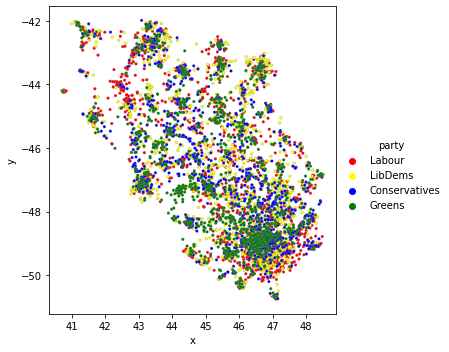

In [35]:
import umap
import seaborn as sns
df = pd.read_csv("data/uk_manifestos.csv")
vec = CountVectorizer(min_df=5, stop_words="english")
dfmat = vec.fit_transform(df["text"])
cdict = {
    'Labour': 'red',
    'LibDems': 'yellow',
    'Conservatives': 'blue',
    'Greens': 'green'
}
reducer = umap.UMAP()
X = reducer.fit_transform(dfmat)
df["x"] = X[:,0]
df["y"] = X[:,1]
sns.relplot(
    data=df, x="x", y="y", hue="party", s=8, 
    palette=cdict, facet_kws={"despine": False},
    edgecolor="grey"
)

In [36]:
df["x"] = X[:,0]
df["y"] = X[:,1]

datasource = ColumnDataSource(df)
color_mapping = CategoricalColorMapper(
    palette=list(cdict.values()),
    factors=list(cdict.keys())
)

plot_figure = figure(
    title='UMAP projection of UK manifestos',
    plot_width=600,
    plot_height=600,
    tools=('pan, wheel_zoom, reset')
)

plot_figure.add_tools(HoverTool(
    tooltips="<span>@text</span>"
))

plot_figure.circle(
    'x',
    'y',
    source=datasource,
    fill_color=dict(field='party', transform=color_mapping),
    line_color="grey",
    line_alpha=0.6,
    fill_alpha=0.6,
    size=4
)
show(plot_figure)

In [225]:
import umap
cdict = {
    'Labour': 'red',
    'LibDems': 'yellow',
    'Conservatives': 'blue',
    'Greens': 'green'
}


In [226]:
# cdict = {
#     'AFD': '#009EE0',
#     'FDP': '#FFED00',
#     'GRUENEN': '#64A12D',
#     'SPD': '#EB001F',
#     "CDU": "#000000",
#     'LINKE': '#8C3473'
# }

In [227]:
reducer = umap.UMAP(n_neighbors=50, min_dist=0.01, metric="cosine")
X = reducer.fit_transform(dfmat)

df["x"] = X[:,0]
df["y"] = X[:,1]

datasource = ColumnDataSource(df)
color_mapping = CategoricalColorMapper(
    palette=list(cdict.values()),
    factors=list(cdict.keys())
)

plot_figure = figure(
    title='UMAP projection of UK manifestos',
    plot_width=600,
    plot_height=600,
    tools=('pan, wheel_zoom, reset')
)

plot_figure.add_tools(HoverTool(tooltips="<span>@text</span>"))

plot_figure.circle(
    'x',
    'y',
    source=datasource,
    fill_color=dict(field='party', transform=color_mapping),
    line_color="grey",
    line_alpha=0.6,
    fill_alpha=0.6,
    size=4
)
show(plot_figure)

In [189]:
reducer = TSNE(metric="cosine")
X = reducer.fit_transform(dfmat)

df["x"] = X[:,0]
df["y"] = X[:,1]

datasource = ColumnDataSource(df)
color_mapping = CategoricalColorMapper(
    palette=list(cdict.values()),
    factors=list(cdict.keys())
)

plot_figure = figure(
    title='UMAP projection of the German manifestos',
    plot_width=600,
    plot_height=600,
    tools=('pan, wheel_zoom, reset')
)

plot_figure.add_tools(HoverTool(tooltips="<span>@text</span>"))

plot_figure.circle(
    'x',
    'y',
    source=datasource,
    fill_color=dict(field='party', transform=color_mapping),
    line_color="grey",
    line_alpha=0.6,
    fill_alpha=0.6,
    size=4
)
show(plot_figure)

/home/max/software/py39/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/max/software/py39/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/max/software/py39/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


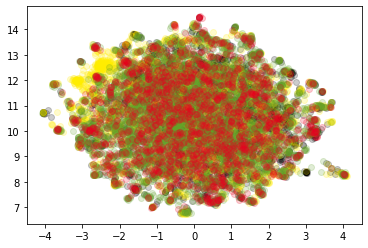

In [157]:
fig, ax = plt.subplots()
reducer = umap.UMAP()
X = reducer.fit_transform(dfmat)
for name, group in df.groupby("party"):
    points = X[group.index,:]
    ax.scatter(points[:,0], points[:,1], color=cdict[name], alpha=0.2)

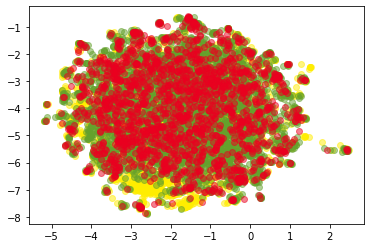

In [149]:
reducer = umap.UMAP(metric="cosine")
X = reducer.fit_transform(dfmat)
fig, ax = plt.subplots()
for name, group in df.groupby("party"):
    points = X[group.index,:]
    ax.scatter(points[:,0], points[:,1], color=cdict[name], alpha=0.5)

In [61]:
from sklearn.metrics.pairwise import cosine_similarity

dist_dfmat = cosine_similarity(dfmat)
distances_dfmat = dist_dfmat[np.tril_indices(dist_dfmat.shape[0])]

dist_X = cosine_similarity(X)
distances_X = dist_X[np.tril_indices(dist_X.shape[0])]





UMAP (euclidean)


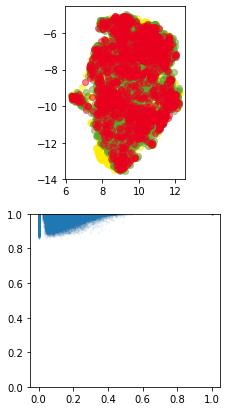

UMAP (cosine)


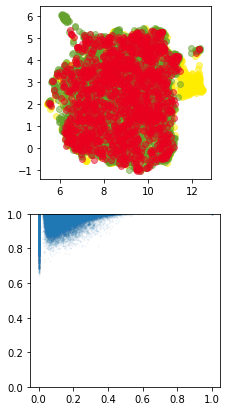

TSNE (euclidean)


/home/max/software/py39/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/max/software/py39/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


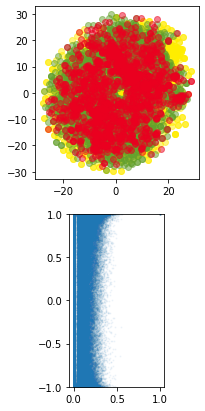

TSNE (cosine)


/home/max/software/py39/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/max/software/py39/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


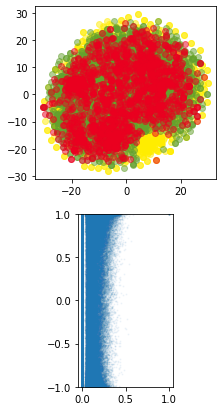

In [76]:
reducers = [
    ("UMAP (euclidean)", umap.UMAP(metric="euclidean")),
    ("UMAP (cosine)", umap.UMAP(metric="cosine")),
    ("TSNE (euclidean)", TSNE(metric="euclidean")),
    ("TSNE (cosine)", TSNE(metric="euclidean")),   
]

for name, reducer in reducers:
    print(name)
    fig, axs = plt.subplots(2, figsize=(3.5,7))
    X = reducer.fit_transform(dfmat)
    for name, group in df.groupby("party"):
        points = X[group.index,:]
        axs[0].scatter(points[:,0], points[:,1], color=cdict[name], alpha=0.5)
    axs[0].set_aspect("equal")
        
    dist_dfmat = cosine_similarity(dfmat)
    distances_dfmat = dist_dfmat[np.tril_indices(dist_dfmat.shape[0])]
    dist_X = cosine_similarity(X)
    distances_X = dist_X[np.tril_indices(dist_X.shape[0])]
    sample_index = np.random.choice(np.arange(len(distances_X)),100000)
    ymin = min(min(distances_X),min(distances_dfmat))
    axs[1].set_ylim(ymin=ymin)
    axs[1].scatter(distances_dfmat[sample_index], distances_X[sample_index], alpha=0.05, s=1)
    axs[1].set_aspect("equal")
    
    
    plt.show()
    

In [78]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper
from bokeh.palettes import Spectral10

output_notebook()

Loading BokehJS ...

In [150]:
reducer = umap.UMAP(metric="cosine")
X = reducer.fit_transform(dfmat)

df["x"] = X[:,0]
df["y"] = X[:,1]

datasource = ColumnDataSource(df)
color_mapping = CategoricalColorMapper(
    palette=list(cdict.values()),
    factors=list(cdict.keys())
)

plot_figure = figure(
    title='UMAP projection of the Digits dataset',
    plot_width=600,
    plot_height=600,
    tools=('pan, wheel_zoom, reset')
)

plot_figure.add_tools(HoverTool(tooltips="<span>@text</span>"))

plot_figure.circle(
    'x',
    'y',
    source=datasource,
    color=dict(field='party', transform=color_mapping),
    line_alpha=0.6,
    fill_alpha=0.6,
    size=4
)
show(plot_figure)

In [97]:
vec = TfidfVectorizer()
dfmat = vec.fit_transform(df["text"])
reducer = umap.UMAP(metric="cosine")
X = reducer.fit_transform(dfmat)

df["x"] = X[:,0]
df["y"] = X[:,1]

datasource = ColumnDataSource(df)
color_mapping = CategoricalColorMapper(
    palette=list(cdict.values()),
    factors=list(cdict.keys())
)

plot_figure = figure(
    title='UMAP projection of the Digits dataset',
    plot_width=600,
    plot_height=600,
    tools=('pan, wheel_zoom, reset')
)

plot_figure.add_tools(HoverTool(tooltips="<span>@text</span>"))

plot_figure.circle(
    'x',
    'y',
    source=datasource,
    color=dict(field='party', transform=color_mapping),
    line_alpha=0.6,
    fill_alpha=0.6,
    size=4
)
show(plot_figure)

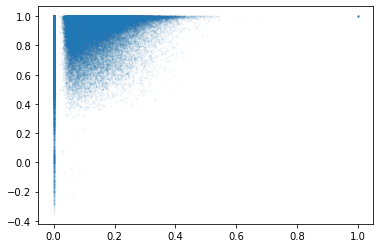

In [60]:
fig, ax = plt.subplots()
sample_index = np.random.choice(np.arange(len(distances_X)),100000)
ax.scatter(distances_dfmat[sample_index], distances_X[sample_index], alpha=0.05, s=1)

/home/max/software/py39/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/max/software/py39/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


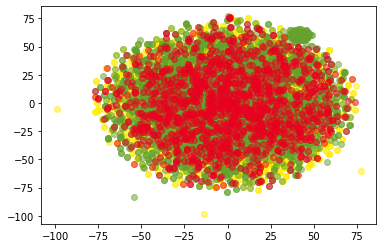

In [28]:
from sklearn.manifold import TSNE
reducer = TSNE()
X = reducer.fit_transform(dfmat)
fig, ax = plt.subplots()
cdict = {
 'FDP': '#FFED00',
 'GRUENEN': '#64A12D',
 'SPD': '#EB001F',
}
for name, group in df.groupby("party"):
    points = X[group.index,:]
    ax.scatter(points[:,0], points[:,1], color=cdict[name], alpha=0.5)